In [1]:
# OUR TASK. Import request & beutiful soup
import requests
import bs4
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

def create_soup(url,tag_name):
    page = requests.get(url)
    soup = bs4.BeautifulSoup(page.text,"lxml")
    result = soup.select(tag_name)
    return result

def get_row_label(current_country, current_province):
    if current_province == '':
        result = current_country
    else:
        result = current_country+':-'+current_province
    return result

# SEARCH ITEMS hhhh
def find_exact(dictionary, search_string):
    result = dictionary.get(search_string)
    return result

def find_wildcard(dictionary,search_string):
    output_dictionary={}
    for key,val in dictionary.items():
        if search_string in key:
            output_dictionary[key] = val
    return output_dictionary


def transpose_for_dataframe(covstats_result):
    row_count = len(covstats_result[1])-1
    
    result={}
    headers = covstats_result[2]
    transposed_result = list(map(list, zip(*covstats_result[1])))  
    transposed_result_row_count = len(transposed_result) -1
    
    for n in range(transposed_result_row_count):   
        result.update({headers[n]:transposed_result[n]})
    return result

def transpose_for_dataframe2(covstats_result):
    row_count = len(covstats_result[2])

    result={}
    headers = covstats_result[3]
    transposed_result = list(map(list, zip(*covstats_result[2])))  
    transposed_result_len = len(transposed_result)
    print(row_count)
    print(transposed_result_len)
    #for n in range(row_count):   
     #   print(headers[n])

    

            
def get_covstats(url,tag):
    data = create_soup(url,tag) 
    #Create Resulting List
    country_lookup = []
    simple_list_output=[]
    #Create Header Row
    headers = data[0].getText()
    headers_list = headers.split('\n')
    headers_list_cleaned = headers_list[2:]

    # data[128:140] this will produce 11 rows
    for item in data[1:]:
        item_text = item.getText()
        item_list = item_text.split('\n')
        #item_list[3-5] is limiting the columns for testing purposes
        item_list_cleaned = item_list[2:]
    
        dictionary_row = dict(zip(headers_list_cleaned, item_list_cleaned))

        # put it into summary list
        current_province =  dictionary_row["Province/State"]
        current_country = dictionary_row["Country/Region"] 
        row_label = get_row_label(current_country, current_province)
        item_number = item.key
        #print(item_number)
        #1. build a SET of countries (FOR LOOKUP)
        country_lookup.append(row_label) 
        #3 Build just a list
        simple_list_output.append(item_list_cleaned)
        
    return [country_lookup,  simple_list_output,  headers_list_cleaned]

In [2]:
#Create our Data
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
tag = '.js-file-line'

covstats_result = get_covstats(url,tag)
input_data_for_dataframe = transpose_for_dataframe(covstats_result)

covid_dataframe = DataFrame(input_data_for_dataframe)
covid_dataframe

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,81890,83585,85647,88004,90192,92708,94676,96098,98038,99758
268,,Western Sahara,24.2155,-12.8858,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
269,,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2160,2177,2191,2197,2217,2239,2267,2304,2337,2383
270,,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,17589,17608,17647,17665,17700,17730,17857,17898,17916,17931


In [3]:
#Working with our dataframe
test_dataframe = covid_dataframe

In [4]:
# GET UK
all_uk = test_dataframe.loc[test_dataframe['Country/Region'].isin(['United Kingdom'])]
uk_mainland = all_uk.loc[all_uk['Province/State'].isin([''])]

all_australia = test_dataframe.loc[test_dataframe['Country/Region'].isin(['Australia'])]

sweden = test_dataframe.loc[test_dataframe['Country/Region'].isin(['Sweden'])]


In [5]:
sweden

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
235,,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,243129,243129,243129,260758,266158,272643,278912,278912,278912,278912


In [6]:
uk_mainland

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
261,,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,1605172,1617327,1629657,1643086,1659256,1674134,1690432,1705971,1723242,1737960


In [7]:
# Stack the DataFrames on top of each other
sweden_uk = pd.concat([sweden, uk_mainland],axis=0)
sweden_uk

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
235,,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,243129,243129,243129,260758,266158,272643,278912,278912,278912,278912
261,,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,1605172,1617327,1629657,1643086,1659256,1674134,1690432,1705971,1723242,1737960


In [8]:
# Data Analysis
#Graph both series

# Let's begin by importing what we'll need (You'll probably be copying and pasting this a lot)

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [9]:
# clip our data

del sweden["Province/State"]
del sweden["Country/Region"]
del sweden["Lat"]
del sweden["Long"]

(array([59., 24., 24., 24., 24., 25., 24., 29., 42., 46.]),
 array([  0. ,  24.2,  48.4,  72.6,  96.8, 121. , 145.2, 169.4, 193.6,
        217.8, 242. ]),
 <a list of 10 Patch objects>)

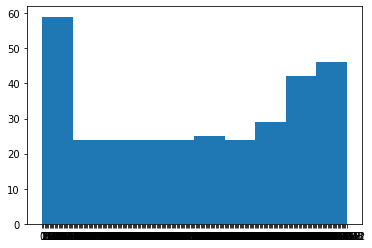

In [11]:
sweden
plt.hist(sweden)

In [ ]:
#del sweden["Country/Region"]

In [27]:
sweden

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
235,0,0,0,0,0,0,0,0,0,0,...,243129,243129,243129,260758,266158,272643,278912,278912,278912,278912


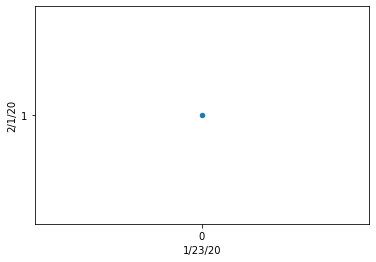

In [23]:
our_plot = sweden.plot.scatter(x=1,y=10)
our_plot

In [29]:
# Let's see a historical view of the closing price
sweden[235].plot(legend=True,figsize=(10,4))

KeyError: 235

In [30]:
sweden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 235 to 235
Columns: 321 entries, 1/22/20 to 12/7/20
dtypes: object(321)
memory usage: 2.5+ KB


In [ ]:
#next step transpose dataframe